# Exploratory Data Analysis (EDA)

### Importar librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression

### Generar combinaciones (no correr)

In [2]:
# tamano = ["small","medium","large"]
# opcion_de_entrega = ["express","coordinado"]
# cantidad_de_paquetes = [1,2,3,4,5,6,7,8,9,10]
# cantidad_de_asistentes = [0,1,2,3,4,5]

# combinations = []
# for i in tamano:
#     for j in opcion_de_entrega:
#         for k in cantidad_de_paquetes:
#             for l in cantidad_de_asistentes:
#                 combinations.append([i,j,k,l])

# print(len(combinations))
# combinations = pd.DataFrame(combinations)
# combinations.to_csv("combinations.csv")

### Cargar resultados

In [3]:
results = pd.read_csv("results.csv", sep = ',')
results.head()

,retiro,entrega,tamano,opcion_de_entrega,cantidad_de_paquetes,cantidad_de_asistentes,lat_retiro,lng_retiro,lat_entrega,lng_entrega,km,precio
0,"Arocena, Montevideo, Uruguay","Mantua, Montevideo, Uruguay",small,express,1,0,-34.887204,-56.057894,-34.887471,-56.050905,0.639574,250
1,"Arocena, Montevideo, Uruguay","Mantua, Montevideo, Uruguay",small,express,1,1,-34.887204,-56.057894,-34.887471,-56.050905,0.639574,860
2,"Arocena, Montevideo, Uruguay","Mantua, Montevideo, Uruguay",small,express,1,2,-34.887204,-56.057894,-34.887471,-56.050905,0.639574,1470
3,"Arocena, Montevideo, Uruguay","Mantua, Montevideo, Uruguay",small,express,1,3,-34.887204,-56.057894,-34.887471,-56.050905,0.639574,2080
4,"Arocena, Montevideo, Uruguay","Mantua, Montevideo, Uruguay",small,express,1,4,-34.887204,-56.057894,-34.887471,-56.050905,0.639574,2690


### Mantener solo columnas necesarias

In [4]:
results = results[["tamano","cantidad_de_paquetes","opcion_de_entrega","cantidad_de_asistentes", "precio"]]
results.head()

,tamano,cantidad_de_paquetes,opcion_de_entrega,cantidad_de_asistentes,precio
0,small,1,express,0,250
1,small,1,express,1,860
2,small,1,express,2,1470
3,small,1,express,3,2080
4,small,1,express,4,2690


### One hot encoding de features categoricas

In [5]:
results = pd.concat([results,
           pd.get_dummies(results['tamano'])], axis=1)
results = pd.concat([results,
           pd.get_dummies(results['opcion_de_entrega'], drop_first = False)], axis=1)
results = results.drop(columns = ["tamano", "opcion_de_entrega"])
results.head()

,cantidad_de_paquetes,cantidad_de_asistentes,precio,large,medium,small,coordinado,express
0,1,0,250,0,0,1,0,1
1,1,1,860,0,0,1,0,1
2,1,2,1470,0,0,1,0,1
3,1,3,2080,0,0,1,0,1
4,1,4,2690,0,0,1,0,1


### Separar en atributos de entrenamiento y atributo objetivo

In [6]:
def sep():
    print('\n','*'*100,'\n')
    
X = results.loc[:, results.columns != "precio"]
y = results.loc[:, results.columns == "precio"]

### Regresor lineal

In [7]:
reg = LinearRegression().fit(X, y)
print("El R2 de la regresión es: ", reg.score(X, y))
sep()
print("Los coeficientes de la regresión son: ", reg.coef_)
sep()
print("La intercepción de la regresión es: ", reg.intercept_)

El R2 de la regresión es:  0.9948220495597196

 **************************************************************************************************** 

Los coeficientes de la regresión son:  [[  57.13030303  610.          104.4         -24.45        -79.95
  -144.08333333  144.08333333]]

 **************************************************************************************************** 

La intercepción de la regresión es:  [178.73333333]


### Visualización

In [8]:
### Cargamos los datos nuevamente
results = pd.read_csv("results.csv", sep = ',')
results = results[["tamano","cantidad_de_paquetes","opcion_de_entrega","cantidad_de_asistentes", "precio"]]
results.head()

,tamano,cantidad_de_paquetes,opcion_de_entrega,cantidad_de_asistentes,precio
0,small,1,express,0,250
1,small,1,express,1,860
2,small,1,express,2,1470
3,small,1,express,3,2080
4,small,1,express,4,2690


### Ordinal encoding

In [9]:
results['tamano'] = results['tamano'].replace(to_replace =['small', 'medium', 'large'], 
                 value = [1,2,3])
results['opcion_de_entrega'] = results['opcion_de_entrega'].replace(to_replace =['express', 'coordinado'], 
                 value = [100,30])
results.head()

,tamano,cantidad_de_paquetes,opcion_de_entrega,cantidad_de_asistentes,precio
0,1,1,100,0,250
1,1,1,100,1,860
2,1,1,100,2,1470
3,1,1,100,3,2080
4,1,1,100,4,2690


### Gráfica 3d

- **Color:**
    1. Rojo: large
    2. Verde: medium
    3. Naranja: small


- **Tamaño de punto:** 
    1. Grande: express
    2. Chico: coordinado

Text(0.5, 0.92, 'Precio de envíos de Envigo')

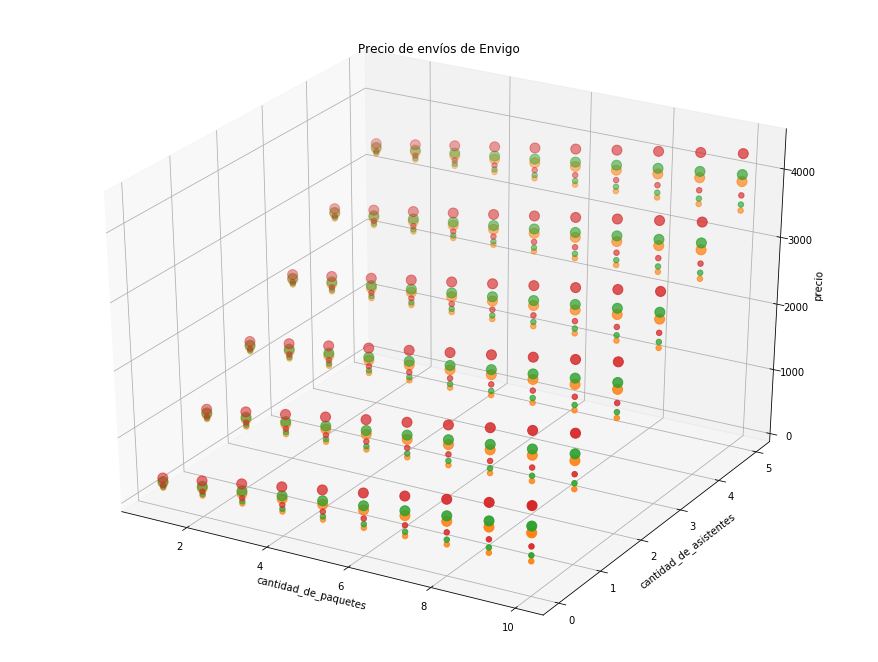

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.style
import matplotlib.cm as cm

fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

colours = []

'''
Para que una variable discreta determine el color de los puntos hay que hacer un mapping del valor entero
de la variable a un color (el cual es una tupla de 4 dimensiones). Con el siguiente loop determinamos el 
colormap al que le queremos mappear los valores discretos y generamos una lista que mapea estos valores
a los colores del colormap
'''

cmap = cm.tab10
for i in results.tamano.to_list():
    colours.append(cmap(i))

results['color'] = colours
    
x = results['cantidad_de_paquetes']
y = results['cantidad_de_asistentes']
z = results['precio']
size = results['opcion_de_entrega']
color = results['color']
ax.scatter(x, y, z, c=color, s=size)
plt.xlabel('cantidad_de_paquetes')
plt.ylabel('cantidad_de_asistentes')
ax.set_zlabel('precio')
plt.title('Precio de envíos de Envigo')

Text(0.5, 1.0, 'Cantidad de asistentes vs. precio')

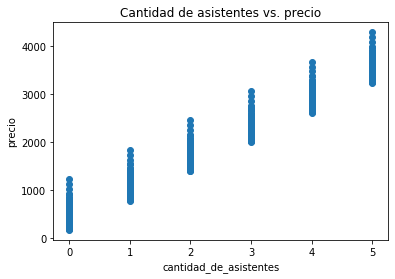

In [11]:
plt.scatter(results.loc[:,'cantidad_de_asistentes'],
            results.loc[:,'precio'])
plt.xlabel('cantidad_de_asistentes')
plt.ylabel('precio')
plt.title('Cantidad de asistentes vs. precio')